# MEAN SHIFT

# Setup
Let us import the required modules.

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering import MeanShiftEvaluation
# from src.models.dataset import DataClusterSplit

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


[Length: 14000; Features: 784]

## Tuning

In [10]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[25, 50],
    hyperparam_vals=[0.5, 0.7]
    # n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    # hyperparam_vals=[0.1, 0.3, 0.5, 0.7, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0]
)
# todo: do something about loading saved files, by calling a function and directly populating the variables

In [11]:
mean_shift_evaluation.load_results()

Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.pkl
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl


In [4]:
%%time
# mean_shift_evaluation.evaluate()

  0%|          | 0/2 [00:00<?, ?it/s]

Processing number of components: 25



                                     
  0%|          | 0/2 [00:00<?, ?it/s]

Processing bandwidth value: 0.5



                                     1.59s/it]
 50%|█████     | 1/2 [04:01<04:01, 241.59s/it]

Processing bandwidth value: 0.7



 50%|█████     | 1/2 [06:17<06:17, 377.94s/it]

Processing number of components: 50



                                              
  0%|          | 0/2 [00:00<?, ?it/s]

Processing bandwidth value: 0.5



                                              
 50%|█████     | 1/2 [02:15<02:15, 135.95s/it]

Processing bandwidth value: 0.7



100%|██████████| 2/2 [11:40<00:00, 350.12s/it]

Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.pkl
Saving /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl
CPU times: user 1min 20s, sys: 7.52 s, total: 1min 28s
Wall time: 11min 40s


In [12]:
mean_shift_evaluation.best_model()

{'model': MeanShift(bandwidth=0.7, n_jobs=-1),
 'n_components': 50,
 'bandwidth': 0.7,
 'score': 0.9033071443878644,
 'n_clusters': 2741,
 'time': 184.97676991700428}

In [13]:
mean_shift_evaluation.results()

{'25': {'0.5': {'score': 0.9011921259681814,
   'n_clusters': 576,
   'time': 241.52084632200422},
  '0.7': {'score': 0.11012297817191023,
   'n_clusters': 3,
   'time': 132.28943323400745}},
 '50': {'0.5': {'score': 0.9025844907289297,
   'n_clusters': 9659,
   'time': 135.88947698300763},
  '0.7': {'score': 0.9033071443878644,
   'n_clusters': 2741,
   'time': 184.97676991700428}}}

In [14]:
mean_shift_evaluation.results_bestmodels()

{25: {'model': MeanShift(bandwidth=0.5, n_jobs=-1),
  'bandwidth': 0.5,
  'score': 0.9011921259681814,
  'n_clusters': 576,
  'time': 241.52084632200422},
 50: {'model': MeanShift(bandwidth=0.7, n_jobs=-1),
  'bandwidth': 0.7,
  'score': 0.9033071443878644,
  'n_clusters': 2741,
  'time': 184.97676991700428}}

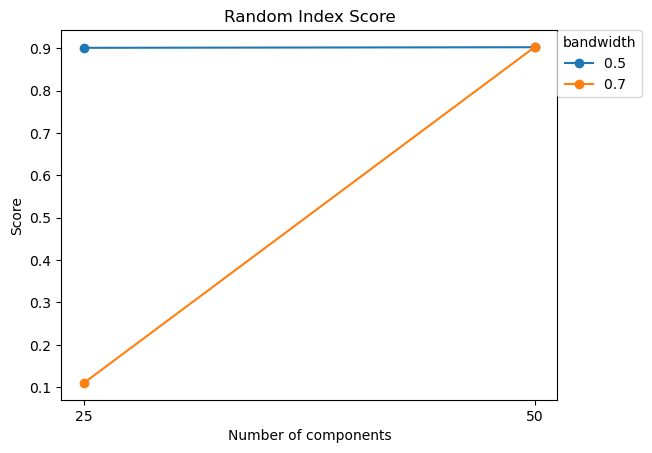

In [15]:
mean_shift_evaluation.plot_score(save=True, file_name="meanshift_score")

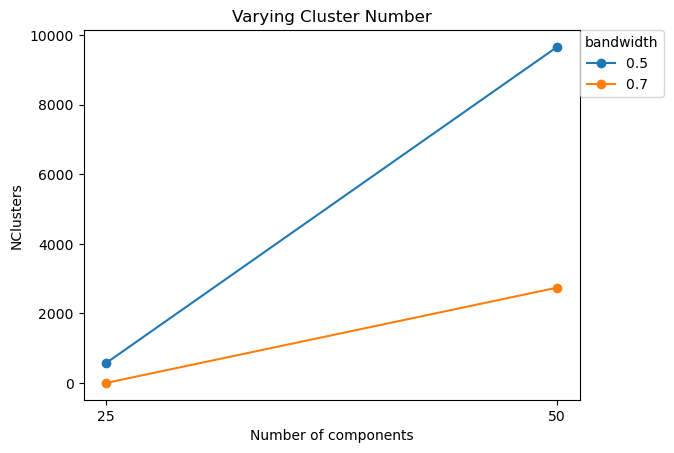

In [16]:
mean_shift_evaluation.plot_n_clusters(save=True, file_name="meanshift_clusters")

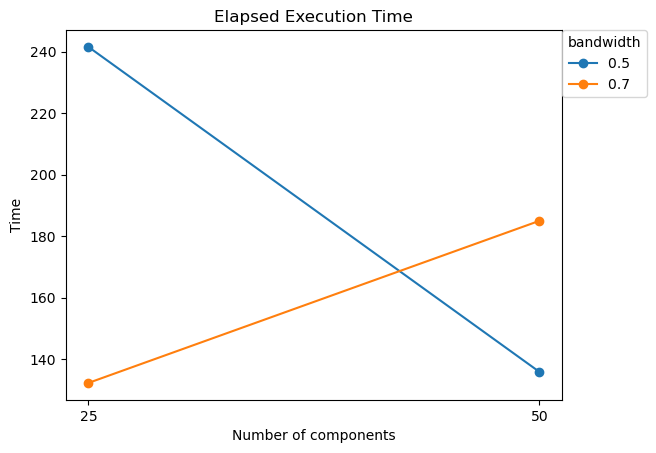

In [17]:
mean_shift_evaluation.plot_time(save=True, file_name="meanshift_exec_time")

## Best model

In [4]:
best = mean_shift_evaluation.best_model
best

MeanShift[N-rows: 14000; N-components: 50; Score: 0.9062438031287949, N-clusters: 6054] [KernelSize: 0.6] 

In [5]:
from assignment_3.clustering.model.model import DataClusterSplit

In [6]:
clusters = DataClusterSplit(data=data, index=best.out)

In [7]:
clusters

ClusterDataSplit [Data: 14000, Clusters: 6054, Mean-per-Cluster: 2.313, Score: 0.906] 

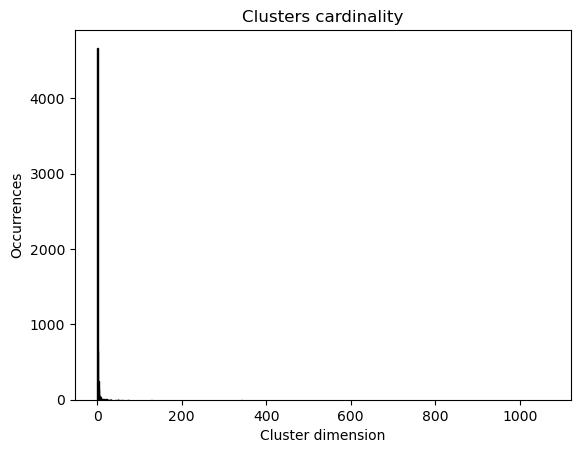

In [8]:
clusters.plot_frequencies_histo()

In [9]:
clusters_best = clusters.get_sub_clusters(a=25)

In [10]:
clusters_best

ClusterDataSplit [Data: 4187, Clusters: 49, Mean-per-Cluster: 85.449, Score: 0.887] 

In [11]:
clusters_best.rand_index_score

0.8868416347051045

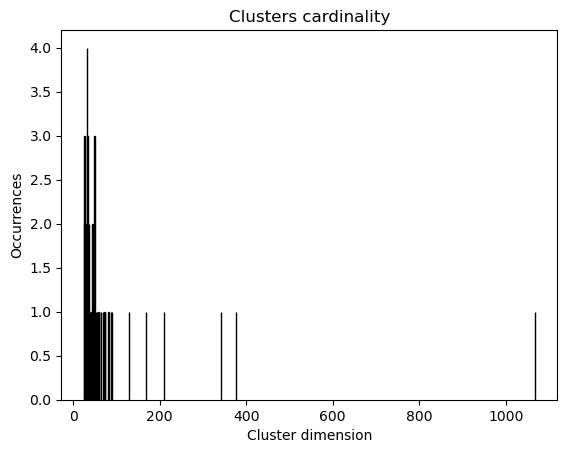

In [12]:
clusters_best.plot_frequencies_histo()

In [ ]:
clusters_best.plot_mean_digit()
# output stra lunghi porcodio

In [14]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [15]:
clusters_bad

ClusterDataSplit [Data: 4669, Clusters: 4669, Mean-per-Cluster: 1.000, Score: 0.854] 

In [ ]:
clusters_bad.plot_mean_digit(sample_out=500)
# output stra lunghi porcodio